In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data

## Training Data

In [ ]:
train = pd.read_csv("/content/sample_data/california_housing_train.csv")

In [ ]:
train.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0


In [ ]:
train.shape

(17000, 9)

In [ ]:
x_train = np.array(train.iloc[:, :-1])
x_train

array([[-114.31  ,   34.19  ,   15.    , ..., 1015.    ,  472.    ,
           1.4936],
       [-114.47  ,   34.4   ,   19.    , ..., 1129.    ,  463.    ,
           1.82  ],
       [-114.56  ,   33.69  ,   17.    , ...,  333.    ,  117.    ,
           1.6509],
       ...,
       [-124.3   ,   41.84  ,   17.    , ..., 1244.    ,  456.    ,
           3.0313],
       [-124.3   ,   41.8   ,   19.    , ..., 1298.    ,  478.    ,
           1.9797],
       [-124.35  ,   40.54  ,   52.    , ...,  806.    ,  270.    ,
           3.0147]])

In [ ]:
x_train.shape

(17000, 8)

In [ ]:
y_train = np.array(train["median_house_value"])
y_train

array([ 66900.,  80100.,  85700., ..., 103600.,  85800.,  94600.])

In [ ]:
y_train.shape

(17000,)

## Test Data

In [ ]:
test = pd.read_csv("/content/sample_data/california_housing_test.csv")

In [ ]:
test.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0


In [ ]:
x_test = np.array(test.iloc[:, :-1])
x_test

array([[-122.05  ,   37.37  ,   27.    , ..., 1537.    ,  606.    ,
           6.6085],
       [-118.3   ,   34.26  ,   43.    , ...,  809.    ,  277.    ,
           3.599 ],
       [-117.81  ,   33.78  ,   27.    , ..., 1484.    ,  495.    ,
           5.7934],
       ...,
       [-119.7   ,   36.3   ,   10.    , ...,  693.    ,  220.    ,
           2.2895],
       [-117.12  ,   34.1   ,   40.    , ...,   46.    ,   14.    ,
           3.2708],
       [-119.63  ,   34.42  ,   42.    , ...,  753.    ,  260.    ,
           8.5608]])

In [ ]:
x_test.shape

(3000, 8)

In [ ]:
y_test = np.array(test["median_house_value"])
y_test

array([344700., 176500., 270500., ...,  62000., 162500., 500001.])

# Data Preprocessing

## Feature Normalization (Mean normalization & Feature Scaling)

In [ ]:
def calc_xmean(x):
  mean = np.zeros(x.shape[1])
  for i in range(x.shape[1]):
    mean[i] = np.mean(x[:, i])
  return mean

In [ ]:
xmean_train = calc_xmean(x_train)
xmean_train

array([-119.56210824,   35.62522471,   28.58935294, 2643.66441176,
        539.41082353, 1429.57394118,  501.22194118,    3.8835781 ])

In [ ]:
def calc_xstd(x):
  std = np.zeros(x.shape[1])
  for i in range(x.shape[1]):
    std[i] = np.std(x[:, 1])
  return std

In [ ]:
xstd_train = calc_xstd(x_train)
xstd_train

array([2.13727693, 2.13727693, 2.13727693, 2.13727693, 2.13727693,
       2.13727693, 2.13727693, 2.13727693])

In [ ]:
def feature_norm(x, mean, std):
  for i in range(x.shape[1]):
    x[:, i] = (x[:, i] - mean[i])/std[i]
  return x

In [ ]:
x_train = feature_norm(x_train, xmean_train, xstd_train)
x_train

array([[ 2.45738311e+00, -6.71520235e-01, -6.35825557e+00, ...,
        -1.93972964e+02, -1.36725105e+01, -1.11823511e+00],
       [ 2.38252150e+00, -5.73264367e-01, -4.48671522e+00, ...,
        -1.40634064e+02, -1.78834762e+01, -9.65517416e-01],
       [ 2.34041184e+00, -9.05462777e-01, -5.42248539e+00, ...,
        -5.13070592e+02, -1.79771716e+02, -1.04463678e+00],
       ...,
       [-2.21678889e+00,  2.90780067e+00, -5.42248539e+00, ...,
        -8.68272794e+01, -2.11586718e+01, -3.98768212e-01],
       [-2.21678889e+00,  2.88908527e+00, -4.48671522e+00, ...,
        -6.15614847e+01, -1.08651999e+01, -8.90796168e-01],
       [-2.24018315e+00,  2.29955006e+00,  1.09534926e+01, ...,
        -2.91760947e+02, -1.08185298e+02, -4.06535104e-01]])

In [ ]:
x_test = feature_norm(x_test, xmean_train, xstd_train)
x_test

array([[-1.16404745e+00,  8.16354338e-01, -7.43634537e-01, ...,
         5.02630507e+01,  4.90240910e+01,  1.27495032e+00],
       [ 5.90521620e-01, -6.38768279e-01,  6.74252683e+00, ...,
        -2.90357292e+02, -1.04910102e+02, -1.33149849e-01],
       [ 8.19785312e-01, -8.63353120e-01, -7.43634537e-01, ...,
         2.54651412e+01, -2.91115348e+00,  8.93577183e-01],
       ...,
       [-6.45175002e-02,  3.15717296e-01, -8.69768099e+00, ...,
        -3.44631962e+02, -1.31579552e+02, -7.45845368e-01],
       [ 1.14262602e+00, -7.13629892e-01,  5.33887158e+00, ...,
        -6.47353612e+02, -2.27963880e+02, -2.86709734e-01],
       [-3.17655441e-02, -5.63906665e-01,  6.27464175e+00, ...,
        -3.16558856e+02, -1.12864149e+02,  2.18840237e+00]])

## Target Normalization

In [ ]:
def calc_ymean(y):
  return np.mean(y)

In [ ]:
ymean_train = calc_ymean(y_train)
ymean_train

207300.91235294117

In [ ]:
def calc_ystd(y):
  return np.std(y)

In [ ]:
ystd_train = calc_ystd(y_train)
ystd_train

115980.35304985354

In [ ]:
def target_norm(y, mean, std):
  y = (y - mean)/std
  return y

In [ ]:
y_train = target_norm(y_train, ymean_train, ystd_train)
y_train

array([-1.21055773, -1.09674535, -1.04846131, ..., -0.89412482,
       -1.04759909, -0.97172417])

In [ ]:
y_test = target_norm(y_test, ymean_train, ystd_train)
y_test

array([ 1.18467554, -0.26557009,  0.54491201, ..., -1.25280626,
       -0.38628019,  2.52370406])

# Some Functions before GD

## Predict Output:

In [ ]:
def predict_output(x, b, w):
  y_pred = b + np.dot(x, w)
  return y_pred

##Compute loss (y_pred - y)

In [ ]:
def calc_loss(x, y, b, w):
  y_pred = b + np.dot(x, w)
  loss = y_pred - y
  return loss

## Compute Cost

In [ ]:
def compute_cost(x, y, b, w):
  m = len(y)
  loss = calc_loss(x, y, b, w)                           # loss: m x 1
  loss_trans = np.transpose(loss)                        # loss_trans: 1 x m
  cost = ( np.dot( loss_trans, loss ) )/(2*m)
  return cost

## Initialize Parameters

In [ ]:
def theta_init(x):
  b = 0             #bias term parameter
  w = np.zeros(x.shape[1])
  return b, w

# Gradient Descent Algorithms

## Batch Gradient Descent

In [ ]:
def grad_desc(x, y, alpha, iter):                           # iter: num of iterations; alpha: learning rate
  m = len(y)
  j_list = []
  b, w = theta_init(x)

  for i in range(iter):
    loss = calc_loss(x, y, b, w)
    x_trans = np.transpose(x)
    b = b - ( alpha * np.sum( loss ) ) / m
    w = w - ( alpha * ( np.dot( x_trans, loss ) ) ) / m
    j_list.append( compute_cost(x, y, b, w) )
  
  j_values = np.array(j_list)

  return j_values, b, w

In [ ]:
# m = 1
# f = 10
# iter = 100
# m*f
# m*f*iter

## (Mini-Batch) Stochastic Gradient Descent

In [ ]:
def create_minibatches(x, y, batch_size):
  minibatches = []
  data = np.hstack((x, y))
  np.random.shuffle(data)
  n_batches = (data.shape[0]) // batch_size

  i=0
  for i in range(n_batches + 1):
    minibatch = data[ i*batch_size : (i+1)*batch_size , :]
    x_batch = minibatch[:, :-1]
    y_batch = minibatch[:, :-1].reshape((-1, 1))
    minibatches.append((x_batch, y_batch))
  if (data.shape[0] % batch_size) != 0:
    mini_batch = data[i * batch_size : data.shape[0]]
    x_mini = minibatch[:, :-1]
    y_mini = minibatch[:, -1].reshape((-1, 1))
    minibatches.append((x_batch, y_batch))
  return np.array(minibatches)

In [ ]:
def bsgd(x, y, alpha, iter, batch_size):                           # iter: num of iterations; alpha: learning rate
  m = len(y)
  j_list = []
  b, w = theta_init(x)

  for i in range(iter):
    minibatches = create_minibatches(x, y, batch_size)
    
    for minibatch in minibatches:
      x_batch, y_batch = minibatch
      loss = calc_loss(x_batch, y_batch, b, w)
      x_batch_trans = np.transpose(x_batch)
      b = b - ( alpha * np.sum( loss ) ) / m
      w = w - ( alpha * ( np.dot( x_batch_trans, loss ) ) ) / m
      j_list.append(compute_cost(x_batch, y_batch, b, w))

  j_values = np.array(j_list)

  return j_values, b, w

# Fitting on train data Using Gradient Descent

In [ ]:
iter = 10000000
alpha = 0.0000015
j_train, b, w = grad_desc(x_train, y_train, alpha, iter)

In [ ]:
def plot_cost():
  plt.title('Cost Funtion: J_train')
  plt.xlabel('No. of iterations ->')
  plt.ylabel('Cost: j_train ->')
  plt.plot(j_train)
  plt.show()

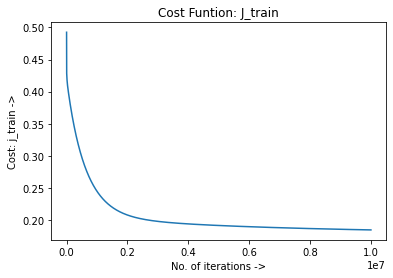

In [ ]:
plot_cost()

In [ ]:
j_train[iter-1]

0.184853970873117

In [ ]:
b

-2.3917462646670985e-15

In [ ]:
w

array([-4.67159365e-01, -4.82038890e-01,  2.67871788e-02, -2.40107640e-04,
        2.02996738e-03, -6.91311658e-04,  1.46337816e-03,  8.05380017e-01])

# Verification on Test Data

##R2 Error

In [ ]:
def calc_rsq(y_pred, y):
  m = len(y_pred)
  y_avg = np.sum(y)/m
  total_error = np.sum((y - y_avg)**2)
  residual_error = np.sum((y - y_pred)**2)
  rsq = 1 - ( residual_error / total_error )
  return rsq

## Calculate R2 Error for Test Data

In [ ]:
y_test_pred = predict_output(x_test, b, w)
y_test_pred

array([ 1.17020338,  0.06209129,  0.57409911, ..., -1.0418487 ,
       -0.37658134,  2.10709686])

In [ ]:
rsq = calc_rsq(y_test_pred, y_test)
rsq

0.6081174638460969

## Residual Plot

In [ ]:
def residual_plot():
  plt.scatter(y_test_pred, y_test_pred - y_test, c='g', s = 40)
  plt.hlines(y=0, xmin=-10, xmax=10)
  plt.title('Residual plot')
  plt.ylabel('Residual')
  plt.show()

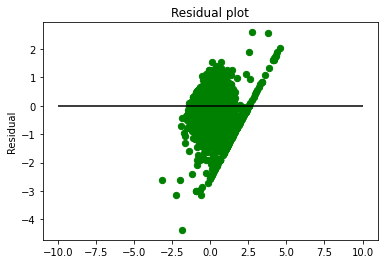

In [ ]:
residual_plot()